# Team Mobile Madness

---

You are on the data science department of a mobile device company. In an effort to extend account lifetime of existing customers, we need to develop targeted A/B experiments. In order to do that efficiently, we need to have a better degree of certainty about which customers are likely to to "churn" and why.

**Goals:**
- Research the concept of "churn" and A/B testing.
- Identify behaviors strongly correlated with churn in this dataset.
- Suggest what we should develop A/B tests for going forward.

**Presentation requirements:**
- Concisely explain churn and A/B testing to the audience.
- At least 50% of presentation must address a non-technical audience.
- Someone who hasn't presented in class yet must take lead on presentation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

df = pd.read_csv("./datasets/churn-bigml-20.csv")

C:\Users\Jembe\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

print (df.dtypes)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [3]:
print(df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
State                     667 non-null object
Account length            667 non-null int64
Area code                 667 non-null int64
International plan        667 non-null object
Voice mail plan           667 non-null object
Number vmail messages     667 non-null int64
Total day minutes         667 non-null float64
Total day calls           667 non-null int64
Total day charge          667 non-null float64
Total eve minutes         667 non-null float64
Total eve calls           667 non-null int64
Total eve charge          667 non-null float64
Total night minutes       667 non-null float64
Total night calls         667 non-null int64
Total night charge        667 non-null float64
Total intl minutes        667 non-null float64
Total intl calls          667 non-null int64
Total intl charge         667 non-null float64
Customer service calls    667 non-null int64
Churn                

In [5]:
print(df.shape)

(667, 20)


In [6]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


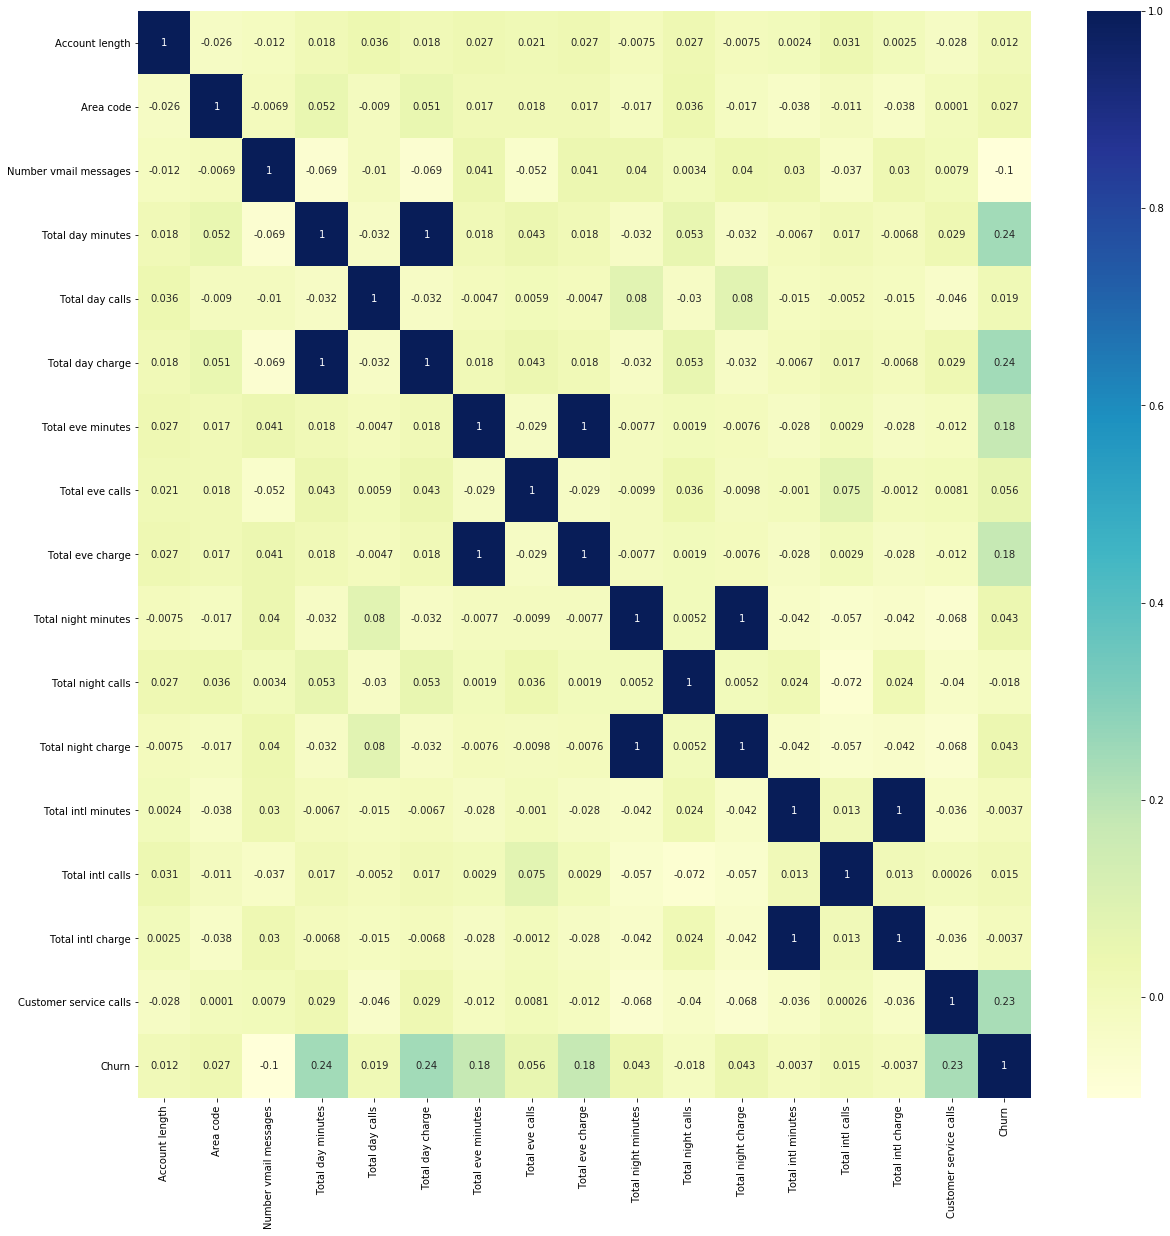

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),  annot=True, cmap="YlGnBu")

In [8]:
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
#df["International plan"].replace("No",0, inplace=True)
#df["International plan"].replace("Yes",1, inplace=True)
#df["International plan"].unique()

In [10]:
#df["Voice mail plan"].replace("No",0, inplace=True)
#df["Voice mail plan"].replace("Yes",1, inplace=True)
#df["Voice mail plan"].unique()

In [11]:
#plt.figure(figsize=(20,20))
#_= sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

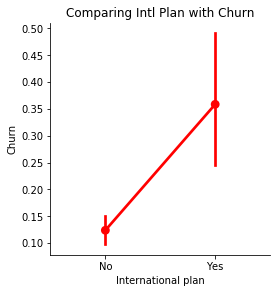

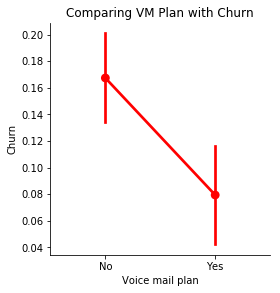

In [12]:
sns.factorplot(x = "International plan",y= "Churn", data = df,color= "r")
plt.title('Comparing Intl Plan with Churn');
sns.factorplot(x = 'Voice mail plan',y="Churn", data = df,color="r")
plt.title('Comparing VM Plan with Churn');

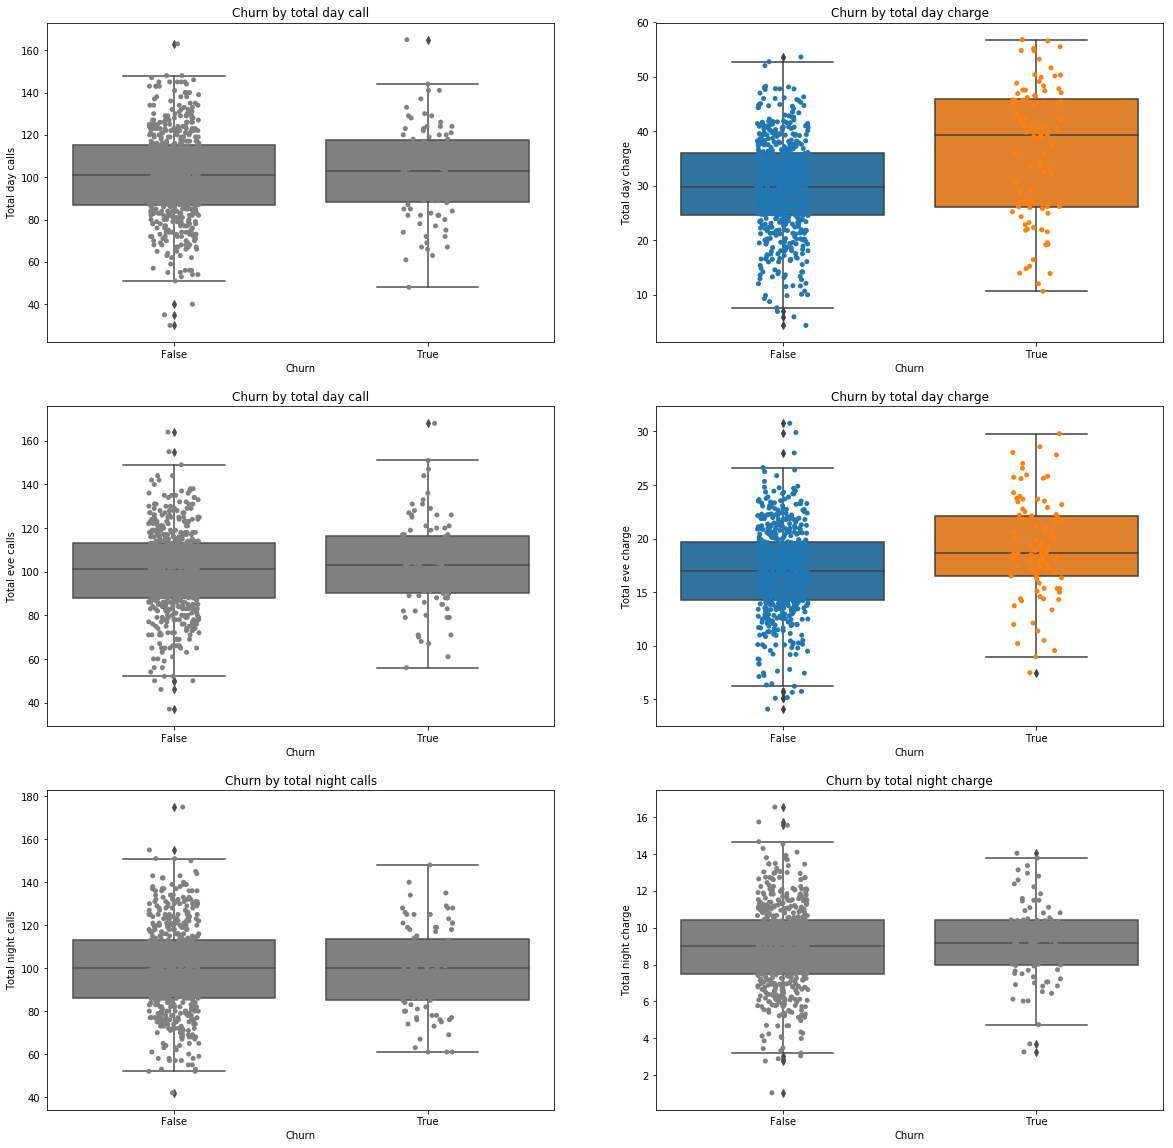

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
ax = sns.boxplot(x="Churn", y="Total day calls",
                data=df,color = "gray")
ax = sns.stripplot(x="Churn", y="Total day calls",
                   data=df, jitter=True,
                   edgecolor="gray",color = "gray")
plt.title("Churn by total day call",fontsize=12);
plt.subplot(3,2,2)
ax = sns.boxplot(x="Churn", y="Total day charge",
                data=df)
ax = sns.stripplot(x="Churn", y="Total day charge",
                   data=df, jitter=True,
                   edgecolor="gray")
plt.title("Churn by total day charge",fontsize=12);

plt.subplot(3,2,3)
ax = sns.boxplot(x="Churn", y="Total eve calls",
                data=df, color = "gray")
ax = sns.stripplot(x="Churn", y="Total eve calls",
                   data=df, jitter=True,
                   edgecolor="gray", color = "gray")
plt.title("Churn by total day call",fontsize=12);


plt.subplot(3,2,4)
ax = sns.boxplot(x="Churn", y="Total eve charge",
                data=df)
ax = sns.stripplot(x="Churn", y="Total eve charge",
                   data=df, jitter=True,
                   edgecolor="gray")
plt.title("Churn by total day charge",fontsize=12);

plt.subplot(3,2,5)
ax = sns.boxplot(x="Churn", y="Total night calls",
                data=df ,color = "gray")
ax = sns.stripplot(x="Churn", y="Total night calls",
                   data=df, jitter=True,
                   edgecolor="gray", color="gray")
plt.title("Churn by total night calls",fontsize=12);

plt.subplot(3,2,6)
ax = sns.boxplot(x="Churn", y="Total night charge",
                data=df, color = "gray")
ax = sns.stripplot(x="Churn", y="Total night charge",
                   data=df, jitter=True,
                   edgecolor="gray", color="gray")
plt.title("Churn by total night charge",fontsize=12);

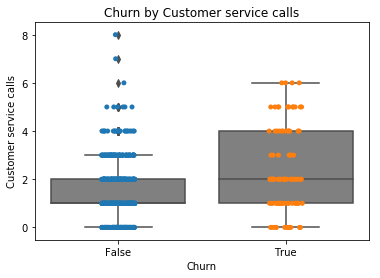

In [14]:

#HIGH TOTAL DAY CHARGES AND TOTAL EVENING CHARGE CAUSE to CHURN

ax = sns.boxplot(x="Churn", y="Customer service calls",
                data=df, color = "gray")
ax = sns.stripplot(x="Churn", y="Customer service calls",
                   data=df, jitter=True,
                   edgecolor="gray")
plt.title("Churn by Customer service calls",fontsize=12);

In [15]:
churn_entries = df.loc[df['Churn'] == True]
aggregate_by_state = churn_entries.groupby('State').size()
highest_churn_state = pd.DataFrame({'State':aggregate_by_state.index, 'Churn Count':aggregate_by_state.values})
highest_churn_state = highest_churn_state[['State', 'Churn Count']].sort_values('Churn Count', ascending=False)
top_six_churn_states = highest_churn_state["State"][:6]
list_of_top_six_churn_states = list(top_six_churn_states)
list_of_top_six_churn_states

['MT', 'WA', 'NJ', 'ID', 'OR', 'CA']

In [16]:
#select = df[['International plan', 'Voice mail plan',  'Total day minutes', 'Total day charge' ,'Total eve charge', 'Customer service calls', 'Churn']]
#select.head()

In [17]:

select = df.drop(['Total day minutes', 'Total eve minutes','Total night minutes','Total intl minutes','State','Account length', 'Area code'], axis=1)

In [18]:
select.head()

,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,No,No,0,97,31.37,80,29.89,90,9.71,4,2.35,1,False
1,No,No,0,137,21.95,83,19.42,111,9.40,6,3.43,4,True
2,No,No,0,67,56.59,97,27.01,128,7.23,9,1.46,4,True
3,No,No,0,103,18.77,102,11.67,105,8.53,6,2.08,2,False
4,No,No,0,117,20.28,109,18.28,90,8.04,1,3.00,1,False


In [19]:
select["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
select["International plan"].replace("No",0, inplace=True)
select["International plan"].replace("Yes",1, inplace=True)
select["International plan"].unique()

array([0, 1], dtype=int64)

In [21]:
select["Voice mail plan"].replace("No",0, inplace=True)
select["Voice mail plan"].replace("Yes",1, inplace=True)
select["Voice mail plan"].unique()

array([0, 1], dtype=int64)

In [22]:
select["Churn"].replace("False",0, inplace=True)
select["Churn"].replace("True",1, inplace=True)
select["Churn"].unique()

array([False,  True], dtype=bool)

In [23]:
select.head()

,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,False
1,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,True
2,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,True
3,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,False
4,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,False


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [25]:
X = select.drop(['Churn'], axis=1)
y = select['Churn']

Feature ranking:
1. feature International plan (0.234336)
2. feature Voice mail plan (0.129148)
3. feature Number vmail messages (0.119140)
4. feature Total day calls (0.075335)
5. feature Total day charge (0.073368)
6. feature Total eve calls (0.072571)
7. feature Total eve charge (0.069691)
8. feature Total night calls (0.067383)
9. feature Total night charge (0.064387)
10. feature Total intl calls (0.045264)
11. feature Total intl charge (0.025312)
12. feature Customer service calls (0.024066)


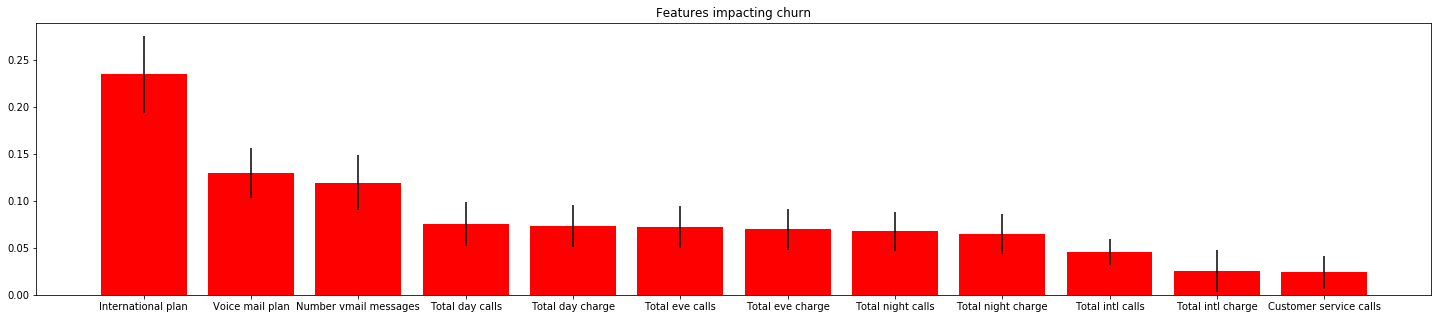

In [32]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, select.columns[f
              ], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(25,5))
plt.title("Features impacting churn")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), select.columns)
plt.xlim([-1, X.shape[1]])
plt.show()